## CS4440 Group project 4
This is the group project on the relation between Hypertension and Stroke.


In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import statistics

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [3]:
path = pathlib.PurePath()
temp = os.path.join(path, 'datasets/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
temp2 = os.path.join(path, 'datasets/diabetes_prediction_dataset.csv')
temp3 = os.path.join(path, 'datasets/combined.csv')
df = pd.read_csv(temp)
df2 = pd.read_csv(temp2)
combined = pd.read_csv(temp3)

C:\Users\Carson\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3258: DtypeWarning: Columns (23,26) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


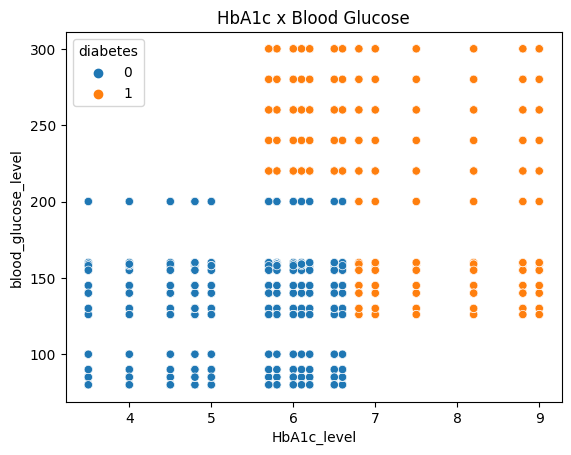

In [64]:
sns.scatterplot(x = "HbA1c_level", y = "blood_glucose_level", hue = "diabetes", data=df2)
plt.title("HbA1c x Blood Glucose")
plt.show()

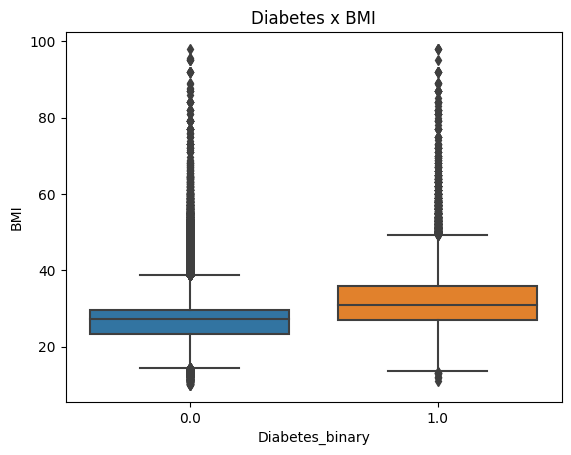

Average BMI of People Without Diabetes: 27.13315721425981
Standard Deviation of People Without Diabetes: 6.334541782853251
Average BMI of People With Diabetes: 31.9526125530265
Standard Deviation of People With Diabetes: 7.401532541622375


In [63]:
sns.boxplot(data=combined, x="Diabetes_binary", y="BMI")
plt.title("Diabetes x BMI")
plt.show()
wo = combined[combined["Diabetes_binary"] == 0]["BMI"]
w = combined[combined["Diabetes_binary"] == 1]["BMI"]

print("Average BMI of People Without Diabetes: " + str(statistics.mean(wo)))
print("Standard Deviation of People Without Diabetes: " + str(statistics.stdev(wo)))
print("Average BMI of People With Diabetes: " + str(statistics.mean(w)))
print("Standard Deviation of People With Diabetes: " + str(statistics.stdev(w)))

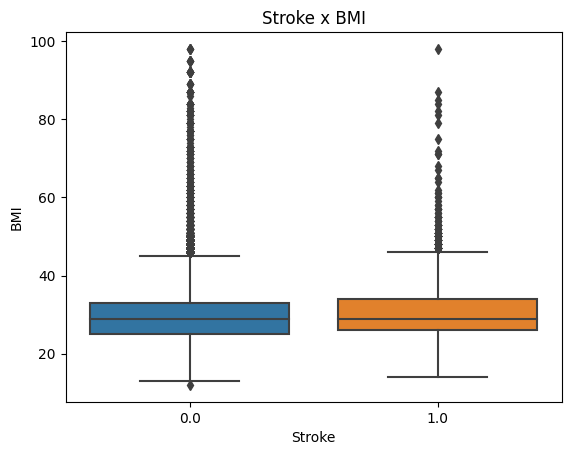

Average BMI of People Without a Stroke: 29.81498408676109
Standard Deviation of People Without a Stroke: 7.096584313010878
Average BMI of People With a Stroke: 30.4905574516496
Standard Deviation of People With a Stroke: 7.342743068513054


In [77]:
sns.boxplot(data=df, x="Stroke", y="BMI")
plt.title("Stroke x BMI")
plt.show()
wo = combined[combined["Stroke"] == 0]["BMI"]
w = combined[combined["Stroke"] == 1]["BMI"]

print("Average BMI of People Without a Stroke: " + str(statistics.mean(wo)))
print("Standard Deviation of People Without a Stroke: " + str(statistics.stdev(wo)))
print("Average BMI of People With a Stroke: " + str(statistics.mean(w)))
print("Standard Deviation of People With a Stroke: " + str(statistics.stdev(w)))

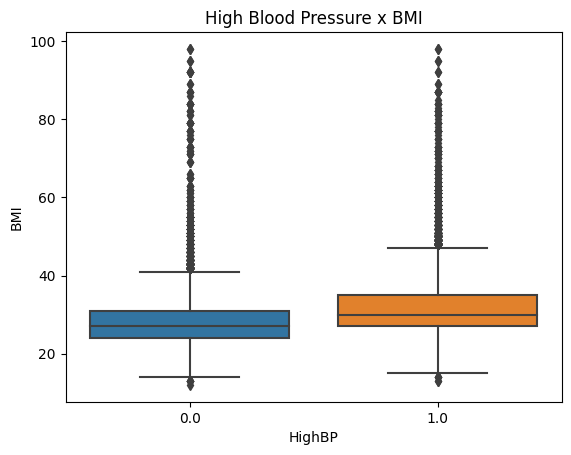

Average BMI of People Without High Blood Pressure: 27.258882431610942
Standard Deviation of People Without High Blood Pressure: 6.520399696801854
Average BMI of People With High Blood Pressure: 31.271257476171353
Standard Deviation of People With High Blood Pressure: 7.199731406874766


In [76]:
sns.boxplot(data=df, x="HighBP", y="BMI")
plt.title("High Blood Pressure x BMI")
plt.show()
wo = combined[combined["HighBP"] == 0]["BMI"]
w = combined[combined["HighBP"] == 1]["BMI"]

print("Average BMI of People Without High Blood Pressure: " + str(statistics.mean(wo)))
print("Standard Deviation of People Without High Blood Pressure: " + str(statistics.stdev(wo)))
print("Average BMI of People With High Blood Pressure: " + str(statistics.mean(w)))
print("Standard Deviation of People With High Blood Pressure: " + str(statistics.stdev(w)))

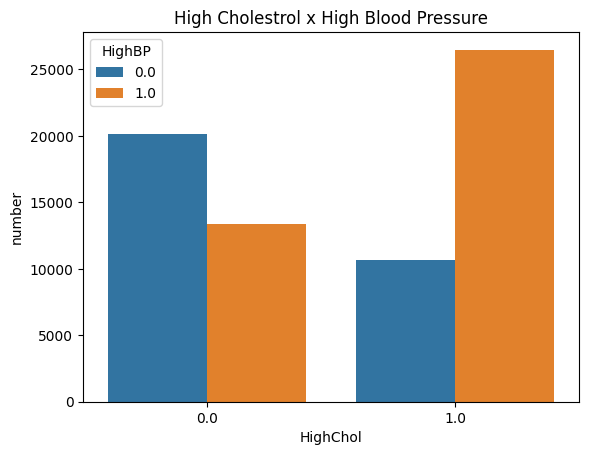

In [75]:
gender = df.groupby(["HighChol", "HighBP"]).size().reset_index(name="number")
sns.barplot(data=gender, x="HighChol", y="number", hue="HighBP")
plt.title("High Cholestrol x High Blood Pressure")
plt.show()

Correlation between Diabetes and Stroke: 0.1254267846851689


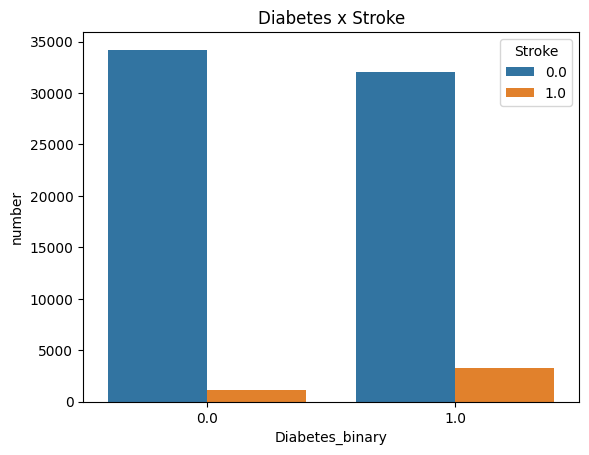

In [80]:
stroke = df.groupby(["Diabetes_binary", "Stroke"]).size().reset_index(name="number")
sns.barplot(data=stroke, x="Diabetes_binary", y="number", hue="Stroke")
plt.title("Diabetes x Stroke")
print("Correlation between Diabetes and Stroke: " + str(df["Diabetes_binary"].corr(df["Stroke"])))

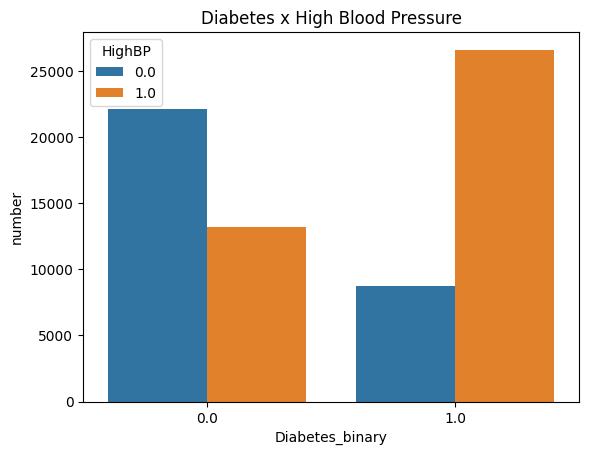

Correlation between Diabetes and High Blood Pressure: 0.38151554890730616


In [81]:
bp = df.groupby(["Diabetes_binary", "HighBP"]).size().reset_index(name="number")
sns.barplot(data=bp, x="Diabetes_binary", y="number", hue="HighBP")
plt.title("Diabetes x High Blood Pressure")
plt.show()
print("Correlation between Diabetes and High Blood Pressure: " + str(df["Diabetes_binary"].corr(df["HighBP"])))

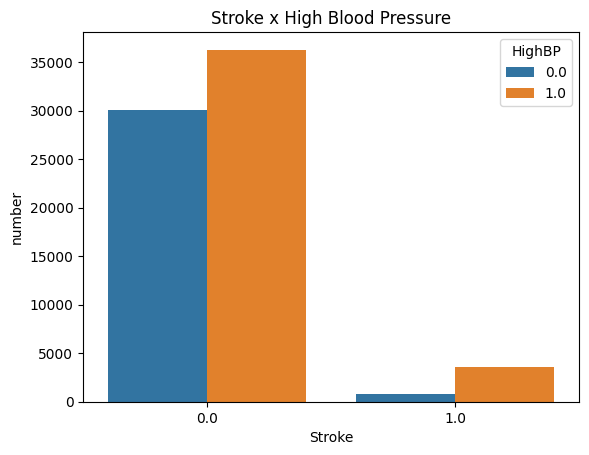

Correlation between Diabetes and High Blood Pressure: 0.12905987239828887


In [82]:
bp = df.groupby(["Stroke", "HighBP"]).size().reset_index(name="number")
sns.barplot(data=bp, x="Stroke", y="number", hue="HighBP")
plt.title("Stroke x High Blood Pressure")
plt.show()
print("Correlation between Diabetes and High Blood Pressure: " + str(df["Stroke"].corr(df["HighBP"])))

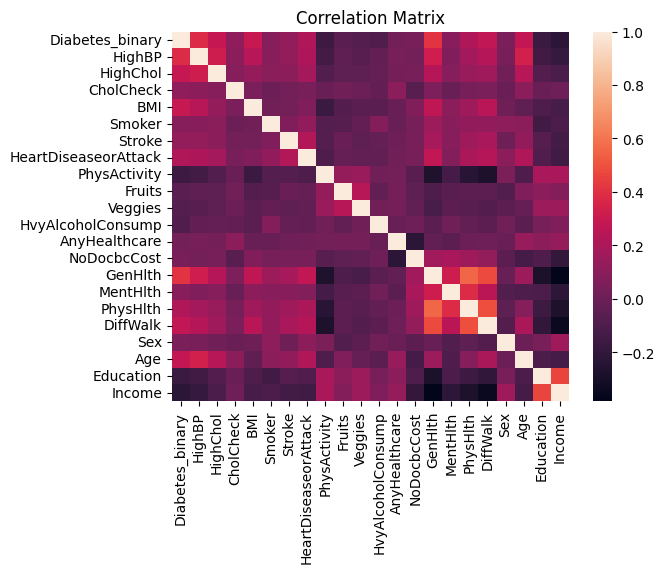

In [67]:
sns.heatmap(df.corr())
plt.title("Correlation Matrix")
plt.show()